
#Q1 :First, Python code analyzed the data of various e-commerce companies and regional sales. I concluded that according to the group's method, under the comparison of each product, we can see that the consumption of different products in other regions is different. We can see that the largest number of individual products consumed by sales is in Region 4. In Region 4, they consume 79 products 31. followed by Region 9, which consumes a total of 60 products 4. where we find that consumers in both Region 8 and Region 9 love product 4 this product.Meanwhile, in Region 2 and Region 7, the most consumed product was product 43, with 40 products and 42 products sold in these two regions, respectively. The best-consumed products are 13,14,43,41,31,48,8 and 4. In addition, I used the groupby method to count the products they sold the least in each region. We found that in regions 4 and 6, they preferred product 29. We also analyzed the ten areas with the lowest sales of products 27, 11, 18, 3, 29, 50, 33, 21 and 20 as the main products.In addition to this, during the data analysis, the total sales of different products in all regions were counted. The data shows that product 2 is the first in total sales, followed by product 14. so the company can add or reduce capacity according to the top1_products statistical chart.

#Q2: Based on the above method, e-commerce should be improved for different regions. For example, for the best-selling products, based on the revenue and the number of sales, we can understand the customer preferences, marketing and strategies in the region, as in regions 8 and 9, their highest sales are 4, so we can recommend the future company can be mass production of product 4, and sales trend analysis in the best-consuming products. Therefore. The Python code made a line graph based on the time of sales in the data, which can see the increase in sales of all products over time. We found an increasing trend from the beginning of January to March and from May to August. We can use this trend to promote and sell our products. We can also produce products from mid-March to May and from early September to October to prepare for product launch and improvement for the following year.

#Q3:Data cleaning approach: Removes rows containing missing values. This could be a more straightforward and intuitive way to do it without the complex process of filling and inferring. It also avoids summarizing conclusions and results from incomplete data during the analysis. Moreover, the method is universally applicable, but this needs to be chosen based on the sample size of the data and the percentage of missing data. Of course, there are some drawbacks. For example, we may lose information, which leads to missing correlations for some variables or leads to data bias. Also, the data is reduced, reducing sample size and not allowing for reliable and accurate analysis. In addition, is the possibility of bias in the results, as removing some missing values may lead to biased results.

In [214]:
import pandas as pd
import seaborn as sns
import sys, os
from matplotlib import rcParams

In [215]:
df = pd.read_csv('https://raw.githubusercontent.com/ZorroHZR/schulich_datascience/main/sales_data.csv')

In [216]:
df.info()
#find the dtype and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [217]:
print(df.shape)

(1050, 5)


In [218]:
print(df.columns)

Index(['Product', 'Region', 'Price', 'Units Sold', 'Sale Date'], dtype='object')


In [219]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [220]:
df.head()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


In [221]:
df.isnull().sum().sort_values(ascending=False)

Price         105
Region        104
Units Sold    104
Product       103
Sale Date       0
dtype: int64

In [222]:
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [223]:
df.rename(columns={'Units Sold': 'Unit'}, inplace=True)
df.rename(columns={'Sale Date': 'Date'},  inplace=False)
#here for change Units sold to Unit, and Sale Data to Date.

,Product,Region,Price,Unit,Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [224]:
df.dropna(axis=0, subset=["Product", "Price"])

,Product,Region,Price,Unit,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
...,...,...,...,...,...
1043,Product_20,Region_6,58.50,9.0,2022-10-06
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1047,Product_17,Region_2,114.37,11.0,2023-12-18


In [225]:
df = pd.DataFrame(df)
df_dropped = df.dropna
print(df_dropped)

<bound method DataFrame.dropna of          Product    Region   Price  Unit   Sale Date
0            NaN  Region_6   75.96  10.0  2022-01-01
1            NaN  Region_1  175.78   8.0  2022-01-02
2     Product_46  Region_3   20.43  12.0  2022-01-03
3     Product_36  Region_1   12.77  10.0  2022-01-04
4     Product_17  Region_6  125.69   6.0  2022-01-05
...          ...       ...     ...   ...         ...
1045  Product_45  Region_7   78.69   8.0  2022-07-28
1046   Product_1  Region_6     NaN   8.0  2022-08-02
1047  Product_17  Region_2  114.37  11.0  2023-12-18
1048         NaN  Region_8     NaN   5.0  2023-12-27
1049  Product_16  Region_2   69.30   8.0  2024-02-23

[1050 rows x 5 columns]>


In [226]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

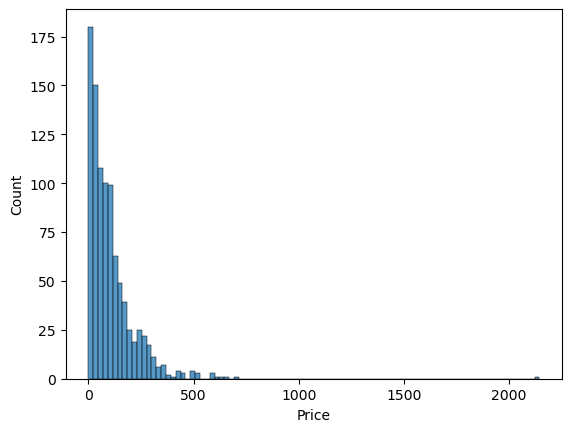

In [227]:
sns.histplot(df['Price'])

In [228]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
mdl_Price_vs_Unit = ols("Price ~ Unit",
                        data=df).fit()
print(mdl_Price_vs_Unit.params)


Intercept    134.708560
Unit          -2.749592
dtype: float64


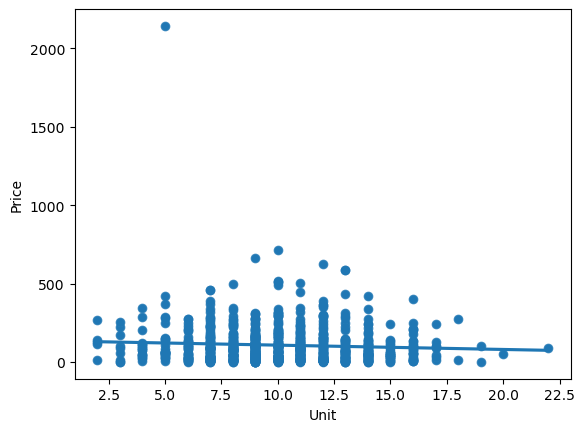

In [230]:
sns.scatterplot(x='Unit', y='Price', data=df)
sns.regplot(x='Unit', y='Price', data=df, ci=False)
plt.show()

In [231]:
import pandas as pd

In [232]:
grouped = df.groupby(['Product', 'Region'])['Unit'].sum().reset_index()
result = grouped.groupby('Region').apply(lambda x: x.loc[x['Unit'].idxmax()])
print(result)
#in this aspect, it can shows which product is most popular item in different region.

              Product     Region  Unit
Region                                
Region_1   Product_13   Region_1  46.0
Region_10  Product_14  Region_10  56.0
Region_2   Product_43   Region_2  40.0
Region_3   Product_41   Region_3  50.0
Region_4   Product_31   Region_4  79.0
Region_5   Product_48   Region_5  54.0
Region_6    Product_8   Region_6  49.0
Region_7   Product_43   Region_7  42.0
Region_8    Product_4   Region_8  51.0
Region_9    Product_4   Region_9  60.0


In [233]:
import pandas as pd

In [234]:
grouped = df.groupby(['Product', 'Region'])['Unit'].sum().reset_index()
result = grouped.groupby('Region').apply(lambda x: x.loc[x['Unit'].idxmin()])
print(result)
#The worst sales of each product in different regions

              Product     Region  Unit
Region                                
Region_1   Product_27   Region_1   0.0
Region_10  Product_11  Region_10   0.0
Region_2   Product_18   Region_2   0.0
Region_3    Product_3   Region_3   3.0
Region_4   Product_29   Region_4   0.0
Region_5   Product_50   Region_5   0.0
Region_6   Product_29   Region_6   0.0
Region_7   Product_33   Region_7   3.0
Region_8   Product_21   Region_8   0.0
Region_9   Product_20   Region_9   0.0


In [235]:
import matplotlib.pyplot as plt

In [236]:
grouped = df.groupby('Region')['Unit'].sum()

In [237]:
top1_products = df[df['Region'].isin(grouped.nlargest(1).index)]

c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


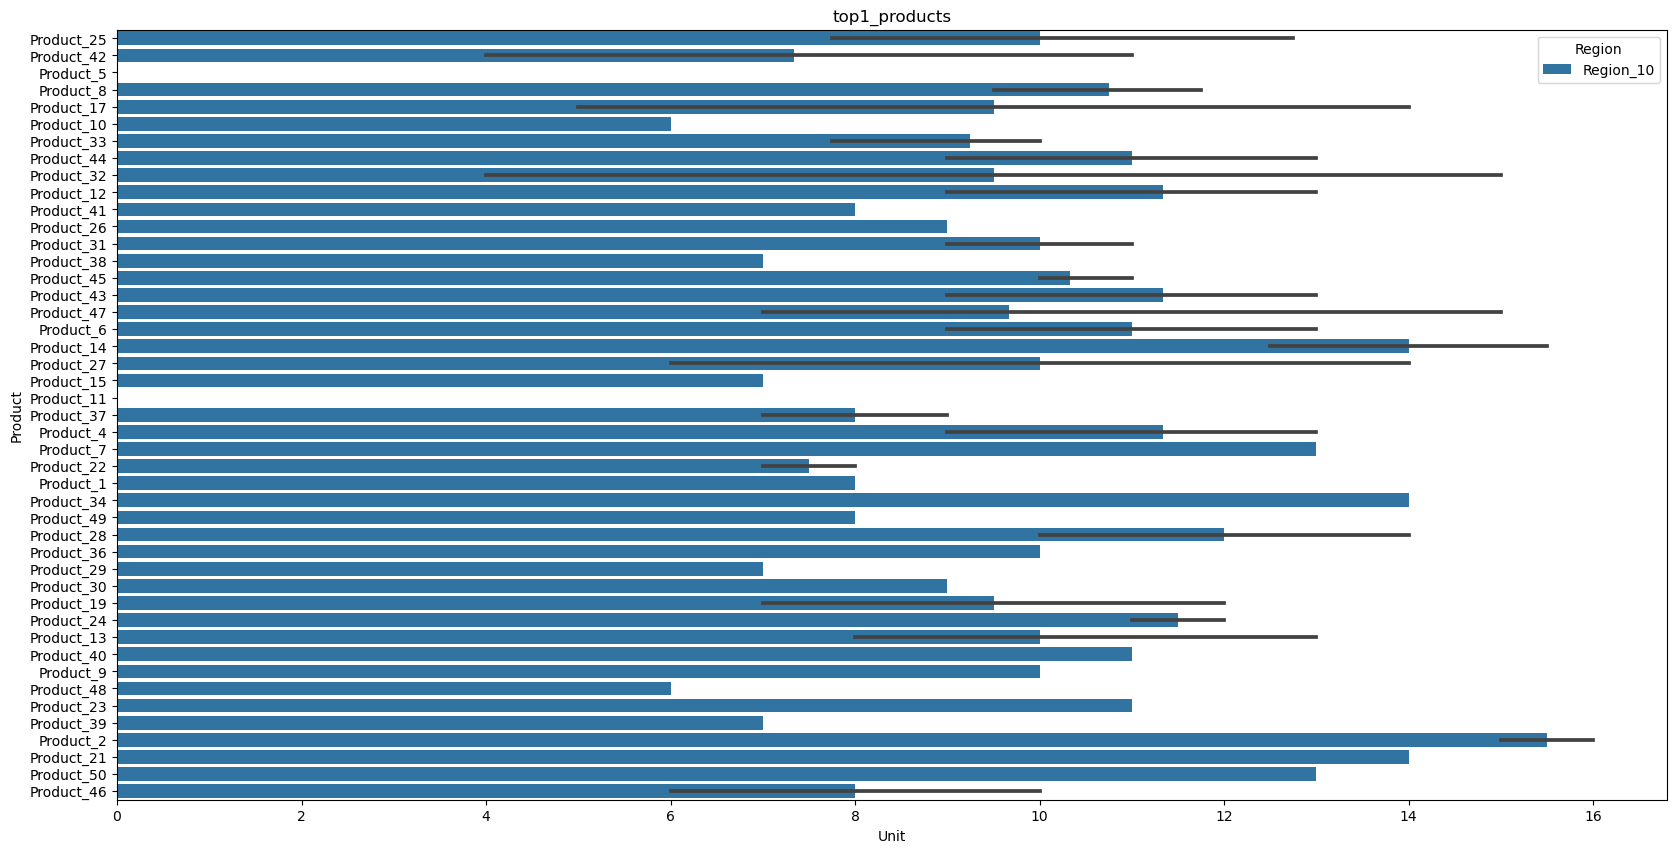

In [238]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Unit', y='Product', hue='Region', data=top1_products)
plt.xlabel('Unit')
plt.ylabel('Product')
plt.title('top1_products')
plt.legend(title='Region')
plt.show()
#Showcasing the best selling products in different regions.The highest selling product in each region is product 2

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    947 non-null    object 
 1   Region     946 non-null    object 
 2   Price      945 non-null    float64
 3   Unit       946 non-null    float64
 4   Sale Date  1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [241]:
df.dropna(inplace=True)
df.dropna(axis=0, subset=["Product", "Region"])

,Product,Region,Price,Unit,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
...,...,...,...,...,...
1043,Product_20,Region_6,58.50,9.0,2022-10-06
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1047,Product_17,Region_2,114.37,11.0,2023-12-18


In [242]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['Month'] = df['Sale Date'].dt.month.astype(int)

In [243]:
print(df['Month'])

2        1
3        1
4        1
5        1
6        1
        ..
1043    10
1044     2
1045     7
1047    12
1049     2
Name: Month, Length: 687, dtype: int32


In [244]:
result = df.groupby(['Month', 'Product']).sum()

C:\Users\dashuaibi\AppData\Local\Temp\ipykernel_31604\3638726989.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby(['Month', 'Product']).sum()


In [245]:
import matplotlib.pyplot as plt

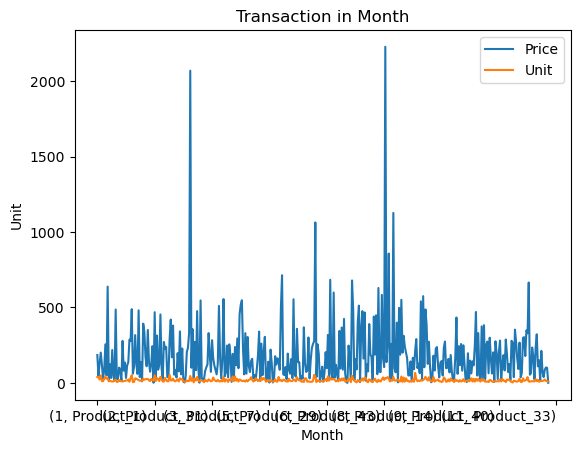

In [246]:
result.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Unit')
plt.title('Transaction in Month')
plt.show()

In [247]:
max_unit_product = result['Unit'].idxmax()

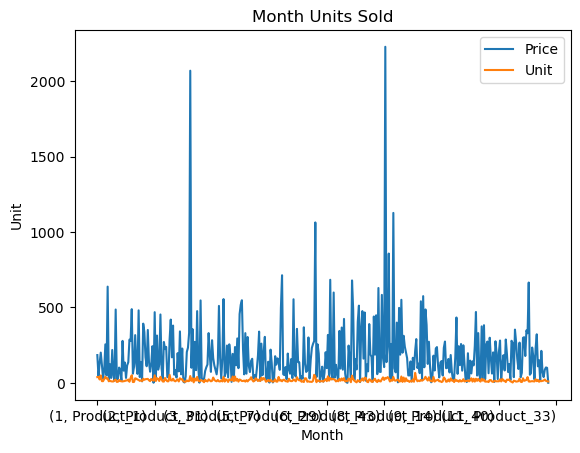

In [248]:
result.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Unit')
plt.title('Month Units Sold')
plt.show()

In [249]:
max_unit_product = result['Unit'].idxmax()
print(result.loc[max_unit_product])

Price    209.78
Unit      66.00
Name: (8, Product_6), dtype: float64


In [250]:
print(result)

                   Price  Unit
Month Product                 
1     Product_1   183.95  38.0
      Product_10   46.38  39.0
      Product_11  128.72  22.0
      Product_13  200.28  49.0
      Product_14  119.10  11.0
...                  ...   ...
12    Product_5    37.84  15.0
      Product_50   86.73  22.0
      Product_6   101.88  13.0
      Product_7    99.32  10.0
      Product_9     0.31   9.0

[394 rows x 2 columns]


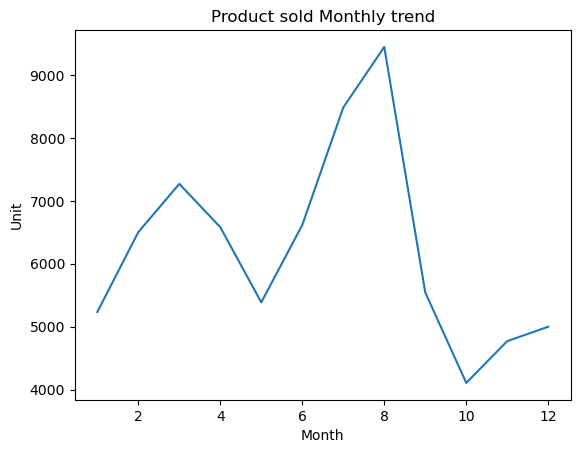

In [251]:
monthly_sales = df.groupby('Month')['Price'].sum()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Unit')
plt.title('Product sold Monthly trend')
plt.show()
#Trend for product sales